# Project: Wrangling and Analyze Data

In [1]:
# import libraries that and packages necesarry for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json as js
import time
from timeit import default_timer as timer
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# download twitter archive into workspace
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image-predictions.tvs'), 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image-predictions.tvs', delimiter='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# create an API object
consumer_key = 'FO4rGdYicveFfcXTXsPuCiM1Z'
consumer_secret = 'OUyoctniZ5aFX9ZKvgr4QvU0liPrznj7uiMb5ln6vgQt58n9Az'
access_token = '1538870200136777728-n5YfkfF4upB5jE6MsdKg5sR36ILZCJ'
access_secret = 'kG2Mr8gTszjjVDtto65LtWwIVmRQOevWo0ObwnlUcqIrW'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 255


Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
18

In [7]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = js.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [8]:
tweet_count_df = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
tweet_count_df.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,6987,33764
1,892177421306343426,5288,29293
2,891815181378084864,3469,22019
3,891689557279858688,7212,36880
4,891327558926688256,7739,35250


## Assessing Data
In this section,  I detected and documented at least **nine (9) quality issues and two (2) tidiness issue**.



### Visual Assessment

In [9]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_count_df

,id_str,retweet_count,favorite_count
0,892420643555336193,6987,33764
1,892177421306343426,5288,29293
2,891815181378084864,3469,22019
3,891689557279858688,7212,36880
4,891327558926688256,7739,35250
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Programmatic Assessment

In [12]:
# Explore twitter archive to check number of entries for the columns
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Explore image predictions to check number of entries for the columns
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Explore tweet count dataframe to check number of entries for the columns
tweet_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [15]:
twitter_archive_df.shape

(2356, 17)

In [16]:
twitter_archive_df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [17]:
# check for duplicated values(s) in the tweet_id column and show duplicate(s) in the twitter archive dataframe

twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
# check for the value count in doggo column
twitter_archive_df.doggo.value_counts().head()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
# check for the value count in floofer column
twitter_archive_df.floofer.value_counts().head()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
# check for the value count in pupper column
twitter_archive_df.pupper.value_counts().head()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
# check for the value count in puppo column
twitter_archive_df.puppo.value_counts().head()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
# check for duplicated values(s) in the tweet_id column and show duplicate(s) in image predictions dataframe
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
# check for the value count in the flooper column

### Quality issues

#### Twitter archive

1. Erroneous datatypes

2. Drop features that are not needed

3. Make all dog names to be in lowercase letters in the name column

4. Replace dog names that don't appear to be a name with none

5. Mistakes on dog ratings

#### Image Predictions

6. Drop likely predictions that are do not appear to be dogs

7. The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters

8. Clean up text column by taking out the url at the end

#### Tweet_count
 
9. Fix columns names from id_str to tweet_id

10. Erroneous Datatype

### Tidiness issues
1.  Duplicated Year and Month variable names

2. Reshare DataFrame

## Cleaning Data
In this section, the issues documented above will be cleaned and tested.

**Note:** A copy of the original data has been copied before cleaning. Cleaning will include merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [24]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_count_df_clean = tweet_count_df.copy()

### Issue #1: Erroneous Datatype

#### Define: 
The following columns datatypes will be change to strings, name, text, doggo, floofler, pupper, puppo, and the timestamp column will be change to datetime64. Also change the id_str to string in the tweet_count dataset

#### Code

In [25]:
#changing datatypes
twitter_archive_df_clean[['timestamp']] = twitter_archive_df_clean[['timestamp']].astype('datetime64')
twitter_archive_df_clean[['name']] = twitter_archive_df_clean[['name']].astype('string')
twitter_archive_df_clean[['text']] = twitter_archive_df_clean[['text']].astype('string')
twitter_archive_df_clean[['doggo']] = twitter_archive_df_clean[['doggo']].astype('string')
twitter_archive_df_clean[['floofer']] = twitter_archive_df_clean[['floofer']].astype('string')
twitter_archive_df_clean[['pupper']] = twitter_archive_df_clean[['pupper']].astype('string')
twitter_archive_df_clean[['puppo']] = twitter_archive_df_clean[['puppo']].astype('string')
tweet_count_df_clean[['id_str']] = tweet_count_df_clean[['id_str']].astype('int64')

#### Test

In [26]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   string        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #2 Remove Retweets in some rows

#### Define:

Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns

#### Code

In [27]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.isnull()]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_user_id.isnull()]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [28]:
twitter_archive_df_clean.retweeted_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2175, dtype: float64

### Issue #3: Drop features that are not needed

#### Define:
We have some columns are have missing and incomplete data, these columns will be drop as they are not needed. The columns includes: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. Also The following columns; 'doggo', 'floofer', 'pupper', 'puppo' will be combined as a single column called Stage, these are all dog stages

#### Code

In [29]:
# First replace None in stage columns with empty string as follows.
twitter_archive_df_clean.doggo.replace('None', '', inplace=True)
twitter_archive_df_clean.floofer.replace('None', '', inplace=True)
twitter_archive_df_clean.pupper.replace('None', '', inplace=True)
twitter_archive_df_clean.puppo.replace('None', '', inplace=True)
# Then combine stage columns.
twitter_archive_df_clean['stage'] = twitter_archive_df_clean.doggo + twitter_archive_df_clean.floofer + twitter_archive_df_clean.pupper + twitter_archive_df_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [30]:
twitter_archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer',
       'pupper', 'puppo' ], axis=1, inplace=True)

#### Test

In [31]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [32]:
twitter_archive_df_clean.stage.value_counts().head()

                1831
pupper           224
doggo             75
puppo             24
doggo,pupper      10
Name: stage, dtype: Int64

### Issue #4:  Replace non-dog names

#### Define:

To have consistency in the name column, this non-dog name are in lowercase; therefore drop and replace with np.nan 


#### Code

In [33]:
mask = twitter_archive_df_clean.name.str.islower() 
column_name = 'name' 
twitter_archive_df_clean.loc[mask, column_name] = np.nan

#### Test

In [34]:
twitter_archive_df_clean.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: string

### Issue #6: Mistakes on dog ratings

#### Define: 
Mistakes on dog rating

#### Code

In [35]:
# find inconsistent factions from text
rating = twitter_archive_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_archive_df_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_archive_df_clean['rating_denominator'] = rating['rating_denominator'].astype(float)


#### Test

In [36]:
twitter_archive_df_clean[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
...,...,...
2351,5.0,10.0
2352,6.0,10.0
2353,9.0,10.0
2354,7.0,10.0


### Issue #7: The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

#### Define:
In the image_predictions_df_clean table, the dogbreeds in the p1, p2, and p3 are not in the same case, convert all the names to lowercase letters. Drop the nan value

#### Code 

In [37]:
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.lower()
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.lower()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.lower()

#### Test

In [38]:
image_predictions_df_clean.p1.head

<bound method NDFrame.head of 0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object>

In [39]:
image_predictions_df_clean.p2.head

<bound method NDFrame.head of 0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english_springer
2071    labrador_retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object>

In [40]:
image_predictions_df_clean.p3.head

<bound method NDFrame.head of 0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object>

### Issue #8: Drop likely predictions that are do not appear to be dogs

#### Define:
Predictions that are not dogs with be replace with NAN in the Image_Prediction_df dataset and NAN will be drop. Interest is the dog predictions.

#### Code

In [41]:
image_predictions_df_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
image_predictions_df_clean['p1_dog'].replace(False, np.nan, inplace = True)
image_predictions_df_clean['p2_dog'].replace(False, np.nan, inplace = True)
image_predictions_df_clean['p3_dog'].replace(False, np.nan, inplace = True)

In [43]:
# drop the nan values and check the coloumns
image_predictions_df_clean.p1_dog.dropna()
image_predictions_df_clean.p2_dog.dropna()
image_predictions_df_clean.p2_dog.dropna()

0       True
1       True
2       True
3       True
4       True
        ... 
2069    True
2070    True
2071    True
2072    True
2073    True
Name: p2_dog, Length: 1553, dtype: object

#### Test

In [44]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #9: Fix columns names from id_str to tweet_id

#### Define
We will apply the rename function to the id_str column in the tweet_count_clean dataset to be in lne with other id values.

#### Code

In [45]:
tweet_count_df_clean.rename(index = int, columns={"id_str" : "tweet_id"}, inplace = True)
tweet_count_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 72.7 KB


### Issue #10: Clean up columns and  take out some columns

#### Define:
create a new column called rating which will be the division of rating_numerator/rating_denomintor. this will be on the the twitter_archive_df_clean dataset.

#### Code

In [46]:
twitter_archive_df_clean['rating'] = twitter_archive_df_clean['rating_numerator']/twitter_archive_df_clean['rating_denominator']

In [47]:
# Replace infinite updated data with nan
twitter_archive_df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
twitter_archive_df_clean.dropna(inplace=True)

In [48]:
twitter_archive_df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,rating
count,2.013000e+03,2013.000000,2013.000000,2013.000000
mean,7.379949e+17,12.210522,10.431694,1.174496
std,6.736633e+16,41.032700,6.295248,4.044587
min,6.660209e+17,0.000000,7.000000,0.000000
25%,6.775737e+17,10.000000,10.000000,1.000000
50%,7.109971e+17,11.000000,10.000000,1.100000
75%,7.902771e+17,12.000000,10.000000,1.200000
max,8.924206e+17,1776.000000,150.000000,177.600000


In [49]:
 # at this point, drop the following columns: expanded_url, rating _numerator and rating_denomination
twitter_archive_df_clean = twitter_archive_df_clean.drop(['text', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [50]:
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",Archie,,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",Darla,,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,,1.2


### Issue #11: Replace url in source column

#### Define

Replace url in source column to iPhone, Twitter, Vine, TweetDeck


#### Code

In [51]:
twitter_archive_df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
twitter_archive_df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
twitter_archive_df_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
twitter_archive_df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

#### Test

In [52]:
twitter_archive_df_clean.source.value_counts().head()

iPhone       1890
Vine           87
Twitter        26
Tweetdeck      10
Name: source, dtype: int64

## Tidiness Issues

### Issue #12: Duplicated year and month variable names

#### Define
Drop timestamp column, the tweet_month and tweet_year in our dataframe

#### Code

In [53]:
twitter_archive_df_clean['tweet_day'] = twitter_archive_df_clean['timestamp'].dt.strftime('%a')


#### Test

In [54]:
twitter_archive_df_clean['tweet_day'].value_counts()

Mon    331
Wed    299
Tue    297
Thu    289
Fri    274
Sat    263
Sun    260
Name: tweet_day, dtype: int64

> Creating the new column and removing the timestamp is to assist in visualization stage.`

### Issue #13: Merge the files

#### Define

The id_str column to be changed to tweet_id for this merge.

the twitter_archieve_df_clean and tweet_count_df_clean will be merge first on the tweet_id. Next we will merge the resulting dataframe first_merge with image_predictions_df_clean on tweet_id column



In [55]:
# next merge will be the twitter_count and the image_predictions_df_clean
twitter_count = pd.merge(twitter_archive_df_clean, tweet_count_df_clean, on=['tweet_id'])

In [56]:
twitter_archive_master = pd.merge(twitter_count, image_predictions_df_clean, on=['tweet_id'], how='left')

#### Test

In [57]:
twitter_archive_master

,tweet_id,timestamp,source,name,stage,rating,tweet_day,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,Phineas,,1.3,Tue,6987,33764,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,iPhone,Tilly,,1.3,Tue,5288,29293,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,Archie,,1.2,Mon,3469,22019,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,Darla,,1.3,Sun,7212,36880,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,NaN,labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,iPhone,Franklin,,1.2,Sat,7739,35250,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,666082916733198337,2015-11-16 02:38:37,iPhone,None,,0.6,Mon,37,92,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1.0,pug,0.489814,True,bull_mastiff,0.404722,True,french_bulldog,0.048960,True
2001,666073100786774016,2015-11-16 01:59:36,iPhone,None,,1.0,Mon,131,274,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1.0,walker_hound,0.260857,True,english_foxhound,0.175382,True,ibizan_hound,0.097471,True
2002,666071193221509120,2015-11-16 01:52:02,iPhone,None,,0.9,Mon,51,127,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1.0,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
2003,666049248165822465,2015-11-16 00:24:50,iPhone,None,,0.5,Mon,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2005 non-null   int64         
 1   timestamp       2005 non-null   datetime64[ns]
 2   source          2005 non-null   object        
 3   name            2005 non-null   string        
 4   stage           2005 non-null   string        
 5   rating          2005 non-null   float64       
 6   tweet_day       2005 non-null   object        
 7   retweet_count   2005 non-null   int64         
 8   favorite_count  2005 non-null   int64         
 9   jpg_url         1888 non-null   object        
 10  img_num         1888 non-null   float64       
 11  p1              1888 non-null   object        
 12  p1_conf         1888 non-null   float64       
 13  p1_dog          1399 non-null   object        
 14  p2              1888 non-null   object        
 15  p2_c

In [59]:
twitter_archive_master.head()

,tweet_id,timestamp,source,name,stage,rating,tweet_day,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,Phineas,,1.3,Tue,6987,33764,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,iPhone,Tilly,,1.3,Tue,5288,29293,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,Archie,,1.2,Mon,3469,22019,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,Darla,,1.3,Sun,7212,36880,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,NaN,labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,iPhone,Franklin,,1.2,Sat,7739,35250,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data

>The merged datasets which have been gathered, assessed, and cleaned will be saved to a CSV file named "twitter_archive_master.csv".

In [60]:
#saving into a csv file
twitter_archive_master.to_csv(r"twitter_archive_master.csv", index=False)

In [61]:
 df_twitter_master = twitter_archive_master.copy()

In [62]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2005 non-null   int64         
 1   timestamp       2005 non-null   datetime64[ns]
 2   source          2005 non-null   object        
 3   name            2005 non-null   string        
 4   stage           2005 non-null   string        
 5   rating          2005 non-null   float64       
 6   tweet_day       2005 non-null   object        
 7   retweet_count   2005 non-null   int64         
 8   favorite_count  2005 non-null   int64         
 9   jpg_url         1888 non-null   object        
 10  img_num         1888 non-null   float64       
 11  p1              1888 non-null   object        
 12  p1_conf         1888 non-null   float64       
 13  p1_dog          1399 non-null   object        
 14  p2              1888 non-null   object        
 15  p2_c

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
>1. Explore the data description.

>2.  Explore the day of the week that had more retweet and favourite counts.

>3. Explore the relationship between the dog ratings, retweets, favourites, img num, p1_conf, p2_conf & p3_conf.

### Visualization

#### Insight 1: Explore the data description

In [63]:
# check the description of the twitter_archive_master
df_twitter_master.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.005000e+03,2005.000000,2005.000000,2005.000000,1888.000000,1888.000000,1.888000e+03,1.888000e+03
mean,7.377690e+17,1.174395,2312.395511,7848.465337,1.207627,0.594375,1.338378e-01,6.018093e-02
std,6.730252e+16,4.052644,4039.909560,11295.024225,0.565109,0.273161,1.004204e-01,5.100620e-02
min,6.660209e+17,0.000000,11.000000,66.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.775576e+17,1.000000,521.000000,1764.000000,1.000000,0.360018,5.389382e-02,1.594160e-02
50%,7.106587e+17,1.100000,1124.000000,3563.000000,1.000000,0.587635,1.168935e-01,4.912045e-02
75%,7.899036e+17,1.200000,2627.000000,9814.000000,1.000000,0.849284,1.940848e-01,9.215672e-02
max,8.924206e+17,177.600000,70553.000000,144629.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


>>>rating: the distance between the 75th percentile to the maximum is very large. This is because some tweets had some outrageous rating. Another point to not is the min with zero(0) rating resulting from tweets without a dog rating. 

>>retweet_count and favorite_count: Had an average which show most tweets had more favorites than retweets.

>>>img_num: From the discription, the least image for a post that had images is 1, while the maximum 4. This confirms that twitter only allows a maximum of 4 pictures in a post.

>>p1-p3_conf: Since they are confidence intervals they should not be greater than 1. Thus the values lie between 0 and 1.

#### Insight 2: Explore the day of the week that had more retweet and favourite counts

In [64]:
df_master_refa = df_twitter_master.groupby(['tweet_day'],as_index=False)['retweet_count', 'favorite_count'].sum()

df_master_refa.sort_values(by=['retweet_count', 'favorite_count'], ascending = False).head(7)

C:\Users\solomon\AppData\Local\Temp\ipykernel_7872\2487158256.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master_refa = df_twitter_master.groupby(['tweet_day'],as_index=False)['retweet_count', 'favorite_count'].sum()


,tweet_day,retweet_count,favorite_count
6,Wed,791753,2593907
1,Mon,757013,2574242
2,Sat,657199,2150607
5,Tue,644440,2287398
0,Fri,623660,2076698
4,Thu,592797,2063414
3,Sun,569491,1989907


In [65]:
#Creating a function for our chart
def top_refa(value1,value2,order):
    result1=df_master_refa.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

#### Retweet count by day of tweets

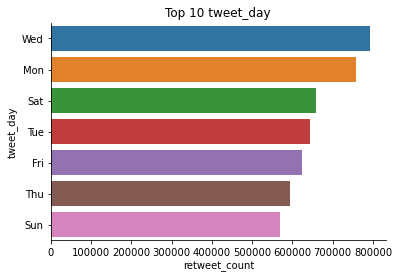

In [66]:
#plot for top retweet counts by day of week in descending order
top_refa('retweet_count','tweet_day', False)
sns.despine()

> There were higher number of retweets made on wednesday, followed by Tuesday and Monday.

 #### Favourite counts by day of tweets

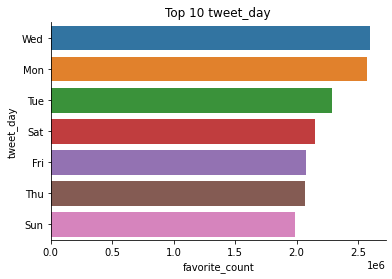

In [67]:
#plot for top favourite counts by day of week in decending order
top_refa('favorite_count','tweet_day', False)
sns.despine()

Wednesdays had higher number of favourite counts, the next day to it is Monddays

#### Insight 2: Explore the relationship between the dog ratings, retweets, favourites, img num, p1, p2 & p3.

To have a clear understanding of the relationship, it will be visualized using snspairplot with ahue over the tweet_day

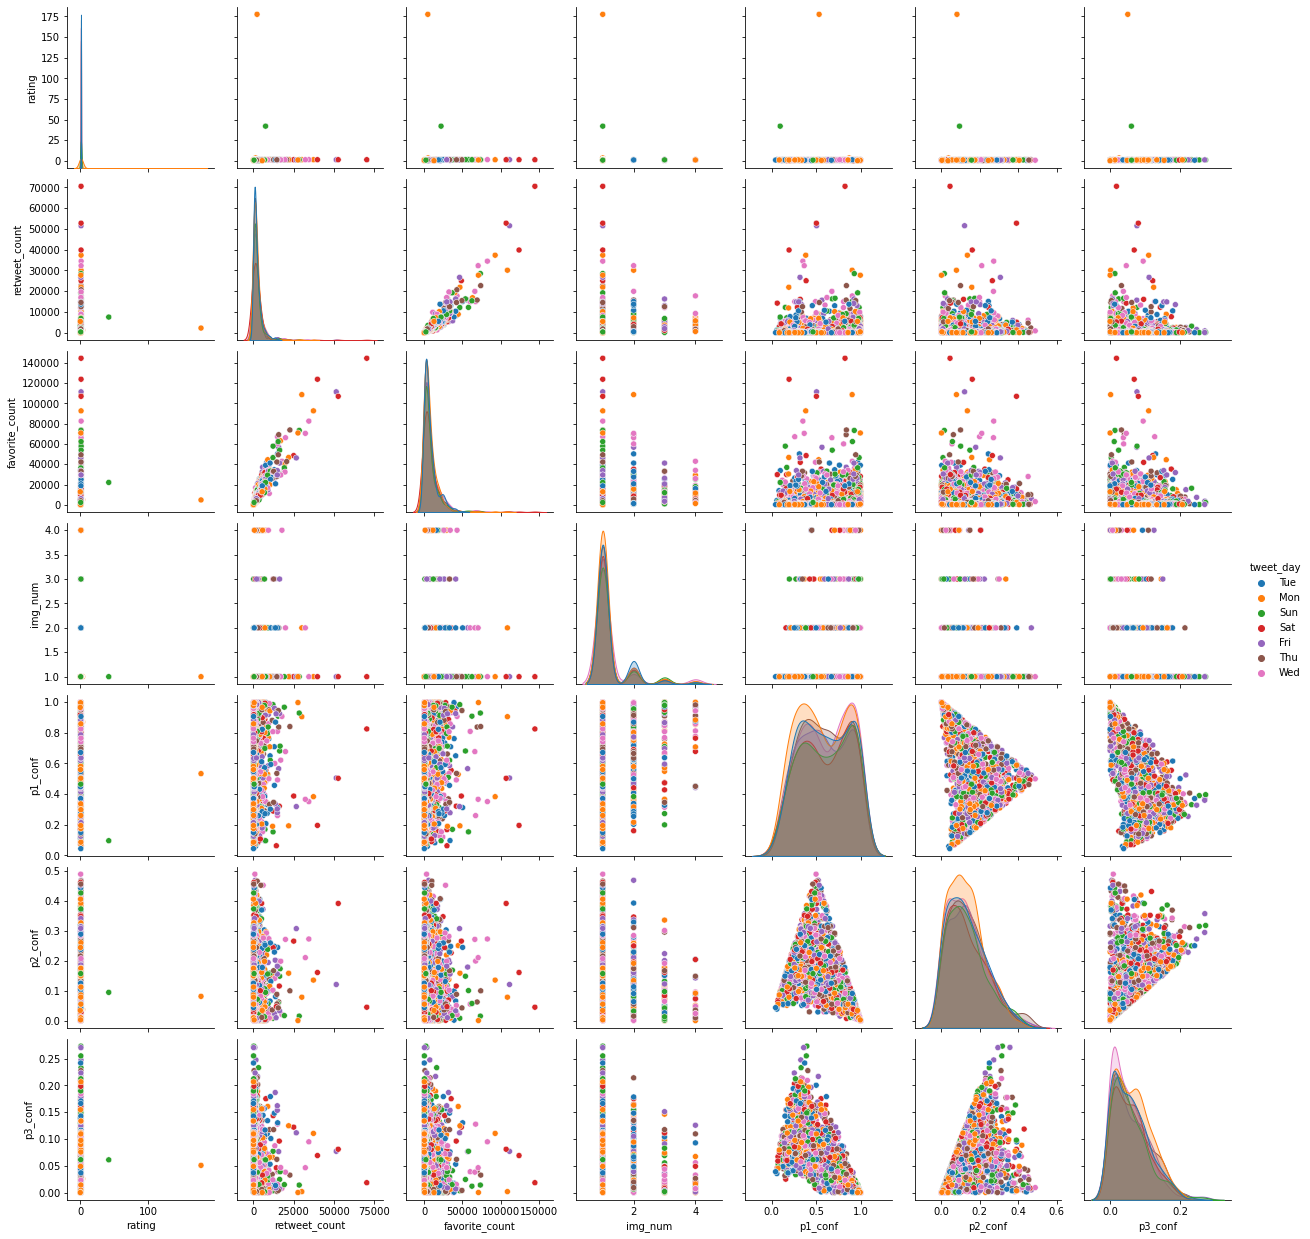

In [68]:
#sns.pairplot(df_master, vars=["rating", "retweet_count", "favorite_count", "img_num", "p1_conf", "p2_conf", "p3_conf"], hue="tweet_day")
sns.pairplot(df_twitter_master, vars =['rating', 'retweet_count', 'favorite_count', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'], hue= 'tweet_day')

In [69]:
df_twitter_master.corr().round(2)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.00,0.03,0.37,0.61,0.21,0.12,-0.00,-0.05
rating,0.03,1.00,0.02,0.02,-0.00,-0.01,-0.01,-0.01
retweet_count,0.37,0.02,1.00,0.92,0.10,0.06,-0.02,-0.04
favorite_count,0.61,0.02,0.92,1.00,0.13,0.08,-0.02,-0.05
img_num,0.21,-0.00,0.10,0.13,1.00,0.21,-0.16,-0.14
p1_conf,0.12,-0.01,0.06,0.08,0.21,1.00,-0.51,-0.71
p2_conf,-0.00,-0.01,-0.02,-0.02,-0.16,-0.51,1.00,0.48
p3_conf,-0.05,-0.01,-0.04,-0.05,-0.14,-0.71,0.48,1.00


The major checkout point from this chart is the relationship between retweet_count and favorite_count. This is later corroborated by the correlation table which show a positive strenght of 0.92 Knowing that the correlation coefficient lies between 0(no correlation) to 1(perfect correlation) this value is close to 1 which makes it a very good correlation.